In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Concatenate, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import numpy as np

## 补充内容：不定长多值序列特征embedding

# 假设数据
texts = ["a|b|c", "a|b", "e|f|g|j"]
numeric_features = tf.constant(np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]))
single_text_features = ["hello", "world", "tensorflow"]
labels = np.random.randint(2, size=len(texts))  # 假设的标签

# 预处理多值字符串特征
multi_value_tokenizer = Tokenizer(filters='|')  # 使用空字符串作为filters，保留所有字符
multi_value_tokenizer.fit_on_texts(texts)
multi_value_sequences = multi_value_tokenizer.texts_to_sequences(texts)
max_seq_length = max(len(seq) for seq in multi_value_sequences)
padded_multi_value_sequences = tf.constant(pad_sequences(multi_value_sequences, maxlen=max_seq_length, padding='post', value=0))

# 预处理单值文本特征
single_text_tokenizer = Tokenizer()
single_text_tokenizer.fit_on_texts(single_text_features)
single_text_sequences = tf.constant(single_text_tokenizer.texts_to_sequences(single_text_features))
single_text_vocab_size = len(single_text_tokenizer.word_index) + 1
single_text_embedding_dim = 64

# 构建模型
embedding_dim_multi = 64
multi_value_input = Input(shape=(max_seq_length),name='multi_value_input')
multi_value_embedding = Embedding(len(multi_value_tokenizer.word_index) + 1, embedding_dim_multi)(multi_value_input)
multi_value_embedding = Flatten()(multi_value_embedding)

numeric_input = Input(shape=(numeric_features.shape[1],),name='numeric_input')

single_text_input = Input(shape=(1,),name='single_text_input')
single_text_embedding = Embedding(single_text_vocab_size, single_text_embedding_dim)(single_text_input)
single_text_embedding = Flatten()(single_text_embedding)

concatenated = Concatenate()([multi_value_embedding, numeric_input, single_text_embedding])
x = Dense(64, activation='relu')(concatenated)
output = Dense(1, activation='sigmoid')(x)  # 假设是二分类问题

model = Model(inputs=[multi_value_input, numeric_input, single_text_input], outputs=output)

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 拟合模型（训练）
# 注意：你需要确保你的数据被正确地划分为训练集和测试集，并适当地处理批次大小和迭代次数
# 这里只是演示如何调用 fit 方法，因此使用原始数据
model.fit([padded_multi_value_sequences, numeric_features, np.array(single_text_sequences)], labels, epochs=10, batch_size=2)




Epoch 1/10


2/2 [==============================] - 5s 16ms/step - loss: 0.8069 - accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 0.7029 - accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6100 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 0.5376 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 14ms/step - loss: 0.4701 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 17ms/step - loss: 0.4115 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 19ms/step - loss: 0.3606 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.3183 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 62ms/step - loss: 0.2802 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 22ms/step - loss: 0.2477 - accuracy: 1.0000


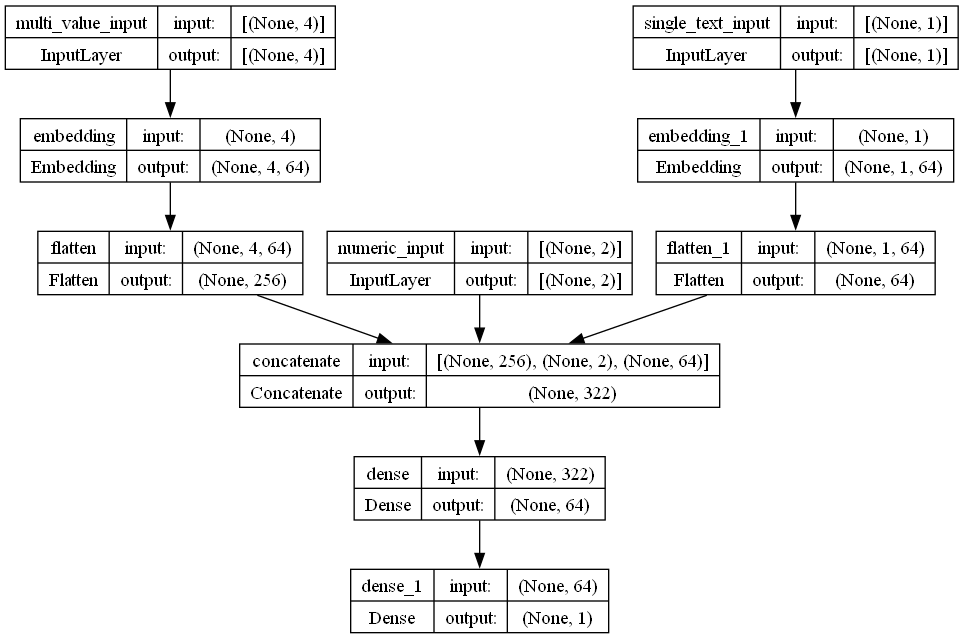

In [2]:
from tensorflow import keras
keras.utils.plot_model(model, "333333.png", show_shapes=True)

In [3]:
multi_value_sequences

[[1, 2, 3], [1, 2], [4, 5, 6, 7]]

In [4]:
padded_multi_value_sequences

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 0],
       [1, 2, 0, 0],
       [4, 5, 6, 7]])>

In [5]:
numeric_features

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]])>

In [6]:
single_text_sequences

<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3]])>